# Sea Level Predictor
- https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/sea-level-predictor

### Use Pandas to import the data from epa-sea-level.csv

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats

print('pd.__version__:', pd.__version__)
print('scipy.__version__:', scipy.__version__)

pd.__version__: 1.5.3
scipy.__version__: 1.10.0


In [10]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [11]:
print(df.columns)
df.info(memory_usage=True)

Index(['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound',
       'Upper Error Bound', 'NOAA Adjusted Sea Level'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [12]:
x_ori = df['Year']
y_ori = df['CSIRO Adjusted Sea Level']

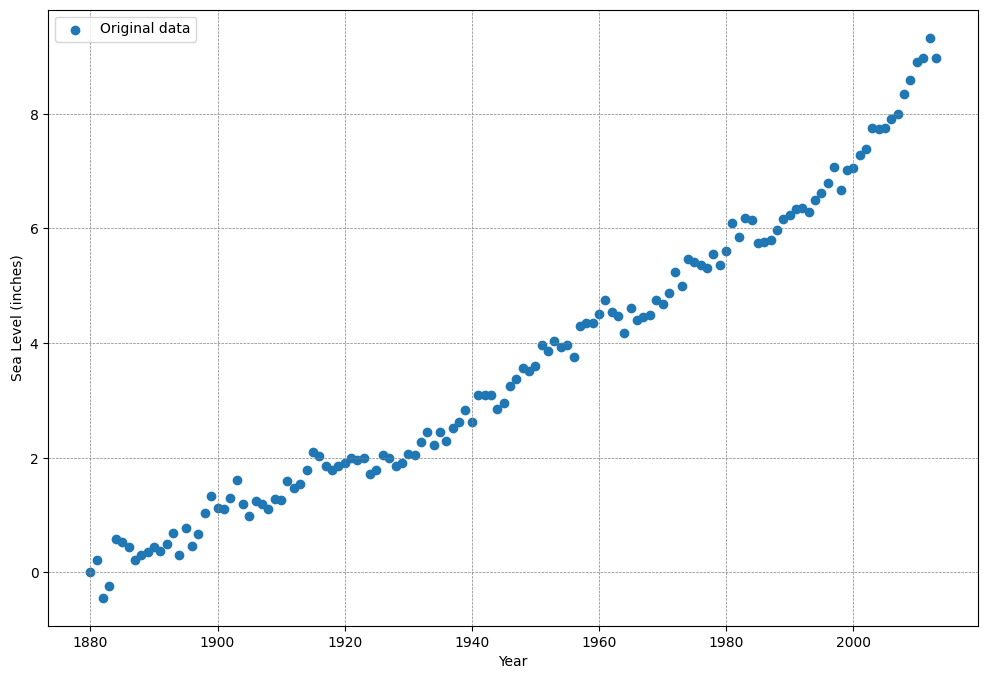

In [15]:
fig, axe = plt.subplots(figsize=(12, 8))

axe.scatter(x= x_ori, y= y_ori, label='Original data')
#axe.set_yticks([i * 10 for i in range(8)])
axe.grid(color='gray', linestyle='--', linewidth= .5)
axe.set_xlabel(df.columns[0])
# axe.set_ylabel(df.columns[1])
axe.set_ylabel('Sea Level (inches)')
axe.legend(loc='upper left')

In [20]:
gain, intercept, rvalue, pvalue, sterr = stats.linregress(x_ori, y_ori)
gain, intercept, rvalue, pvalue, sterr

(0.06304458401213482,
 -119.06594196773983,
 0.984757131182585,
 3.788696979113155e-102,
 0.0009692118713287152)

In [22]:
x_ori, type(x_ori)

(0      1880
 1      1881
 2      1882
 3      1883
 4      1884
        ... 
 129    2009
 130    2010
 131    2011
 132    2012
 133    2013
 Name: Year, Length: 134, dtype: int64,
 pandas.core.series.Series)

In [32]:
s1 = pd.Series([1, 2, 3])
print(s1)
s2 = pd.Series([6, 7, 8])
print(s2)
# https://sparkbyexamples.com/pandas/pandas-combine-two-series-into-dataframe/

pd.concat([s1, s2])



0    1
1    2
2    3
dtype: int64
0    6
1    7
2    8
dtype: int64


0    1
1    2
2    3
0    6
1    7
2    8
dtype: int64

In [36]:
x_rest = pd.Series([i for i in range(2014, 2051)])
x_all = pd.concat([x_ori, x_rest])
#x_all, x_ori, x_rest
y_pred_all = intercept + gain * x_all

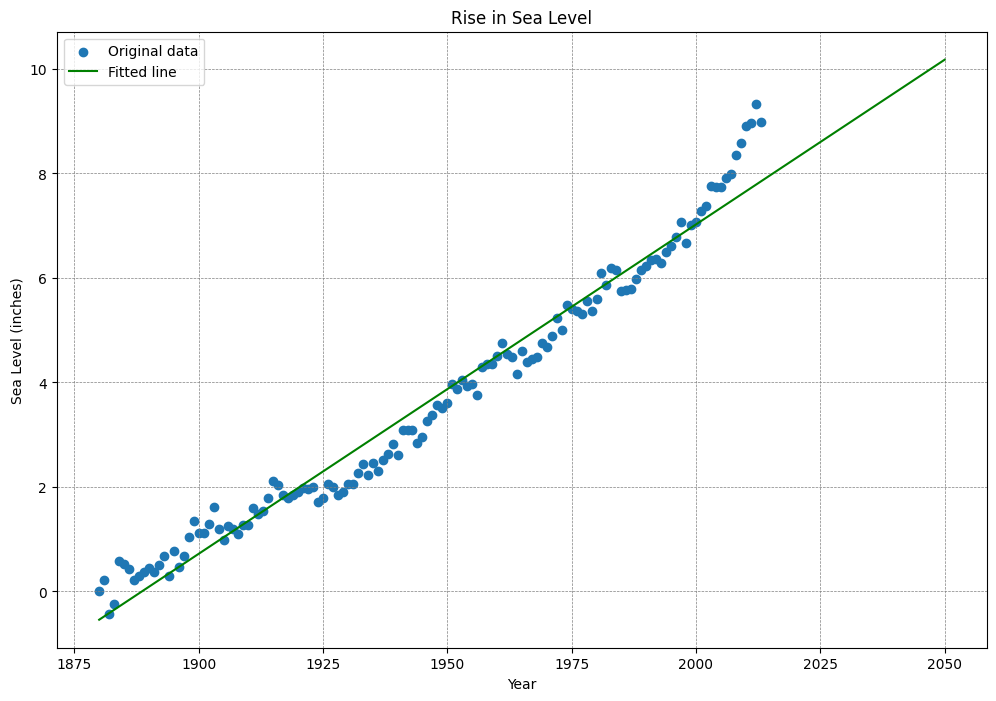

In [41]:
fig, axe = plt.subplots(figsize=(12, 8))

axe.scatter(x= x_ori, y= y_ori, label='Original data')
axe.grid(color='gray', linestyle='--', linewidth= .5)
axe.set_title('Rise in Sea Level')
axe.set_xlabel('Year')
axe.set_ylabel('Sea Level (inches)')

axe.plot(x_all, y_pred_all, color='green', label='Fitted line')

axe.legend(loc='upper left')

In [46]:
# df_2k: DF from year 2000 through the most recent year in the dataset.

df_2k = df.loc[df['Year'] >= 2000]
df_2k.reset_index(inplace=True)
df_2k

,index,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,120,2000,7.062992,6.791339,7.334646,6.920582
1,121,2001,7.287402,7.019685,7.555118,7.087460
2,122,2002,7.381890,7.110236,7.653543,7.319698
3,123,2003,7.759843,7.484252,8.035433,7.488353
4,124,2004,7.740157,7.464567,8.015748,7.507933
5,125,2005,7.744094,7.472441,8.015748,7.644563
6,126,2006,7.917323,7.645669,8.188976,7.697420
7,127,2007,7.996063,7.712598,8.279528,7.702147
8,128,2008,8.350394,8.078740,8.622047,7.907365
9,129,2009,8.586614,8.311024,8.862205,8.046354


In [47]:
x_2k = df_2k['Year']
y_2k = df_2k['CSIRO Adjusted Sea Level']
y_2k

0     7.062992
1     7.287402
2     7.381890
3     7.759843
4     7.740157
5     7.744094
6     7.917323
7     7.996063
8     8.350394
9     8.586614
10    8.901575
11    8.964567
12    9.326772
13    8.980315
Name: CSIRO Adjusted Sea Level, dtype: float64

In [48]:
gain2k, intercept2k, rvalue2k, pvalue2k, sterr2k = stats.linregress(x_2k, y_2k)
gain2k, intercept2k, rvalue2k, pvalue2k, sterr2k

(0.1664272733318682,
 -325.7934668059649,
 0.9762875716140618,
 2.4388064141618245e-09,
 0.010652933111541163)

In [53]:
x_2k_2k50 = pd.concat([x_2k, x_rest])
y_pred_2k = intercept2k + gain2k * x_2k_2k50

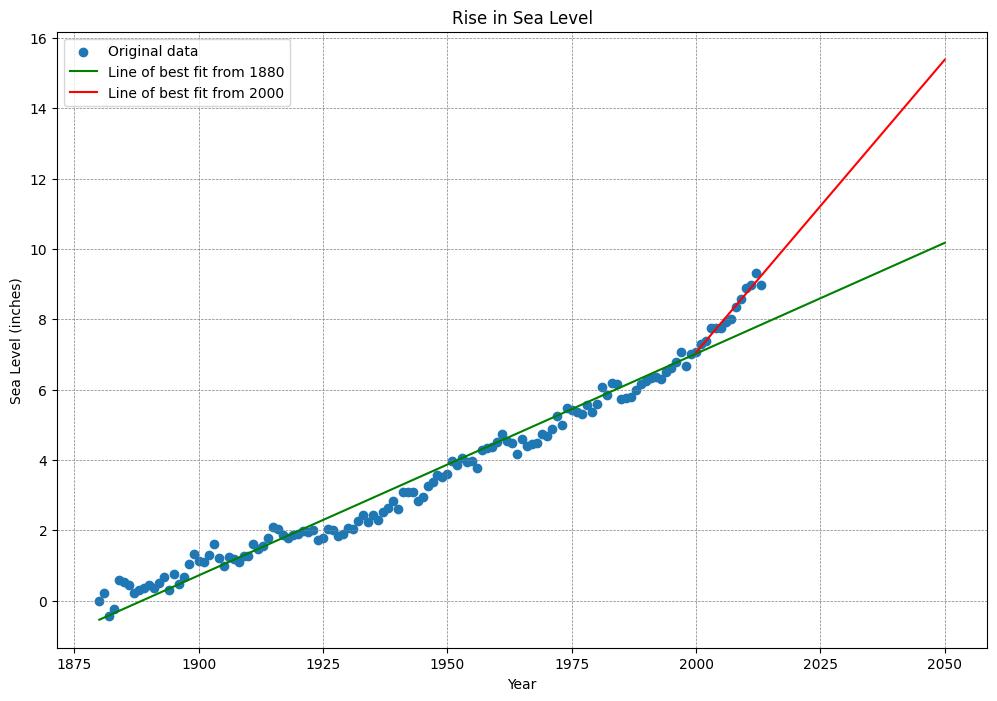

In [55]:
fig, axe = plt.subplots(figsize=(12, 8))

axe.scatter(x= x_ori, y= y_ori, label='Original data')
axe.grid(color='gray', linestyle='--', linewidth= .5)
axe.set_title('Rise in Sea Level')
axe.set_xlabel('Year')
axe.set_ylabel('Sea Level (inches)')

axe.plot(x_all, y_pred_all, color='green', label='Line of best fit from 1880')
axe.plot(x_2k_2k50, y_pred_2k, color='red', label='Line of best fit from 2000')

axe.legend(loc='upper left')